In [44]:
import numpy as np
import pandas as pd
import imageio
import h5py
import pickle
import librosa

from tqdm import tqdm
from xqdm import xqdm
from pathlib import Path
import matplotlib.pyplot as plt
import re

ModuleNotFoundError: No module named 'librosa'

In [5]:
csv_files = sorted(list(Path('data/interpolation').glob('*.csv')))

In [9]:
csv_list = [pd.read_csv(f) for f in csv_files]
csv = pd.concat(csv_list)

In [10]:
csv

,timestamp,acceleration_x,acceleration_y,acceleration_z,angular_vec_x,angular_vec_y,angular_vec_z,input_orientation_x,input_orientation_y,input_orientation_z,input_orientation_w,input_orientation_yaw,input_orientation_pitch,input_orientation_roll
0,1.020121e+12,0.591386,9.818921,-0.787716,-0.007071,0.003447,-0.002072,0.051709,0.054229,0.016040,0.997060,0.106758,0.101622,0.037603
1,1.020133e+12,0.608542,9.883211,-0.789847,0.010745,-0.003407,-0.008484,0.052227,0.054400,0.015926,0.997025,0.107091,0.102662,0.037449
2,1.020145e+12,0.614358,9.786939,-0.786015,0.012159,-0.005893,-0.013466,0.052378,0.054239,0.015692,0.997030,0.106789,0.102994,0.036981
3,1.020157e+12,0.599924,9.667338,-0.796326,0.007424,-0.008523,-0.010310,0.052418,0.054180,0.015804,0.997029,0.106658,0.103066,0.037203
4,1.020168e+12,0.601040,9.711021,-0.792891,-0.000430,-0.011982,-0.009481,0.051973,0.053933,0.015796,0.997066,0.106180,0.102186,0.037114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2.719071e+12,0.053354,9.790885,-0.559241,-0.065190,-0.057624,-0.108190,0.035207,-0.007749,-0.015259,0.999233,-0.014420,0.070216,-0.031046
19139,2.719083e+12,0.030683,9.773702,-0.544439,-0.060502,-0.070252,-0.099202,0.034797,-0.008852,-0.016077,0.999226,-0.016581,0.069349,-0.032750
19140,2.719094e+12,-0.051797,9.773137,-0.524755,-0.056279,-0.084092,-0.090888,0.034393,-0.009853,-0.016471,0.999224,-0.018570,0.068500,-0.033601
19141,2.719106e+12,-0.139438,9.804537,-0.509998,-0.053034,-0.093675,-0.086610,0.034293,-0.010966,-0.016926,0.999208,-0.020768,0.068253,-0.034585


In [14]:
csv.columns

Index(['timestamp', 'acceleration_x', 'acceleration_y', 'acceleration_z',
       'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
       'input_orientation_x', 'input_orientation_y', 'input_orientation_z',
       'input_orientation_w', 'input_orientation_yaw',
       'input_orientation_pitch', 'input_orientation_roll'],
      dtype='object')

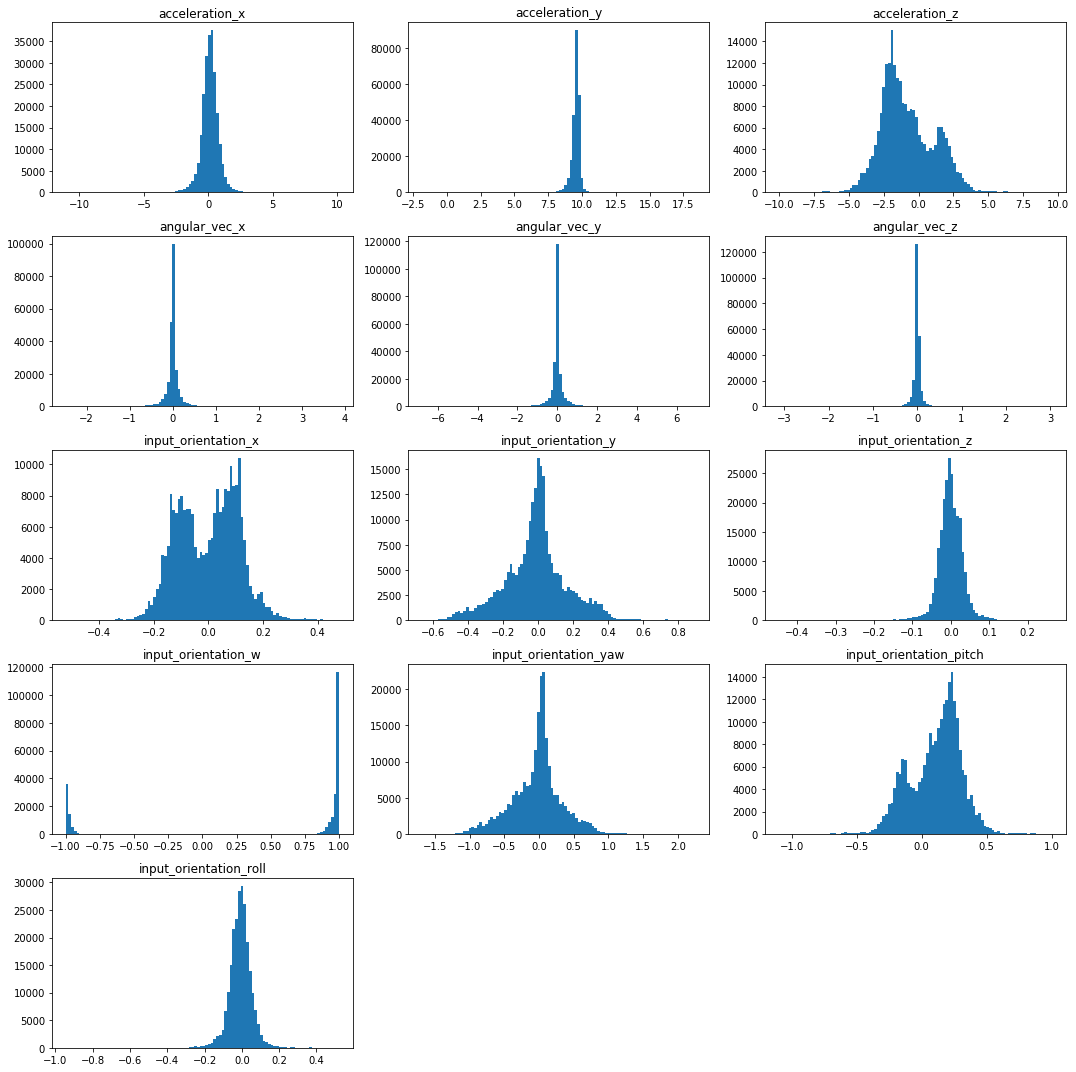

In [18]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(csv.columns[1:], 1):
    plt.subplot(5, 3, i)
    plt.hist(csv[col], bins=100)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [28]:
for col in csv.columns[1:]:
    c = csv[col]
    print('>', col)
    print(f'max : {c.max():.4f}\t|\tmin: {c.min():.4f}')
    print(f'mean: {c.mean():.4f}\t|\tstd: {c.std():.4f}')
    print()

> acceleration_x
max : 10.1532	|	min: -11.0662
mean: 0.1318	|	std: 0.7284

> acceleration_y
max : 18.4051	|	min: -1.8329
mean: 9.5277	|	std: 0.4173

> acceleration_z
max : 9.5799	|	min: -10.0646
mean: -0.7997	|	std: 1.9420

> angular_vec_x
max : 3.8651	|	min: -2.4904
mean: -0.0003	|	std: 0.1763

> angular_vec_y
max : 6.9541	|	min: -6.7994
mean: 0.0004	|	std: 0.3785

> angular_vec_z
max : 3.0412	|	min: -3.1357
mean: -0.0005	|	std: 0.0965

> input_orientation_x
max : 0.4787	|	min: -0.5231
mean: -0.0016	|	std: 0.1115

> input_orientation_y
max : 0.9016	|	min: -0.6656
mean: -0.0134	|	std: 0.1777

> input_orientation_z
max : 0.2629	|	min: -0.4485
mean: -0.0011	|	std: 0.0348

> input_orientation_w
max : 1.0000	|	min: -0.9998
mean: 0.4911	|	std: 0.8446

> input_orientation_yaw
max : 2.2532	|	min: -1.6836
mean: -0.0259	|	std: 0.3657

> input_orientation_pitch
max : 1.0014	|	min: -1.1010
mean: 0.1074	|	std: 0.1990

> input_orientation_roll
max : 0.5216	|	min: -0.9456
mean: -0.0082	|	std: 0.0645

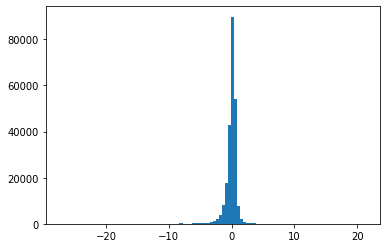

In [42]:
col = 'acceleration_y'
mean = csv[col].mean()
std = csv[col].std()
q = csv[col]
r = (q - mean) / std
plt.hist(r, bins=100)
plt.show()

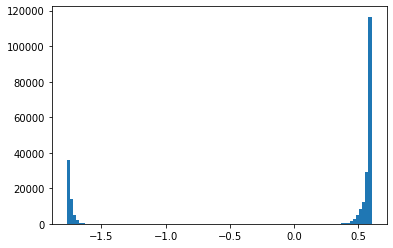

In [41]:
col = 'input_orientation_w'
mean = csv[col].mean()
std = csv[col].std()
q = csv[col]
r = (q - mean) / std
plt.hist(r, bins=100)
plt.show()